# Author: Kumar R.

## Agenda:

Create a model to predict whether or not the loan will be default using the historical data.

### Problem Statement

For a companies like Lending Club, predicting whether or not the loan will be default is very important.Using the historical data form 2007 to 2015, you have to build a deep learning model to predict the chance of default for the future loans. As you will see this data is highly imbalanced and contains more features that makes this problem more challenging.

**Domain:** Finance

**Analysis to be done:** Exploratory Data Analysis, Preprocessing and a Deep learning predict model.

**Dataset columns and defination**

**Credit.policy:** 1, if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

**Purpose:** Purpose of the loan (Types:"credit_card", "debt_consolidation", "educational","home_improvement", "major_purchase", "small_business", and "all_other" )

**int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment:** The monthly installments owed by the borrower if the loan is funded.

**log.annual.inc:** The natural log of the self-reported annual income of the borrower.

**dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico:** The FICO credit score of the borrower.

**days.with.cr.line:** The number of days the borrower has had a credit line.

**revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Steps to Perform

Perform exploratory data analysis and feature engineering. Follow up with a deep learning model to predict whether or not the loan will be defaul using the historical data.

**Tasks:**

1) **Feature transformation:** Transform categorical values into numerical values(Discrete)

2) **EDA** Exploratory Data Analysis of different factors of the dataset

3) **Feature Engineering** Check the correlation betwee the features and drop those features which have a strog correlation

4) **Modelling:** Create a deep learning model using Keras and Tensorflow backend.

**_Coding part starts below_ **

In [2]:
#Importing the required libraries of Data Science and Deep Learning.

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset "LOAN_DATA"
data = pd.read_csv('loan_data.csv')

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratoy Data Analysis(EDA)

In [5]:
print("Number of Rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])

Number of Rows:  9578
Number of columns:  14


In [6]:
#Get the overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


* There are total 14 columns and 9578 observations in each column.
* The dataset contains int, float and categorical data type.
* Credit.policy is the label where rest all other columns are considere as features.

In [7]:
#check whether the dataset is a binary or multi class classification
print(data['credit.policy'].unique())
data['credit.policy'].value_counts()

[1 0]


1    7710
0    1868
Name: credit.policy, dtype: int64

* It is a binary classification problem.
* The creddit.policy contains 7710 loan granted (label=1) observations and 1868 not-granted (label=0) cases. **This is has high imbalance data where 80% of the total observations have same label**.

In [8]:
#Create a function to find any missing values in the columns.

def missing(data):
    column = data.columns
    if column.isnull().any():
        print("This column has missing values: ",column)
    else:
        print("There is No missing data in any of the columns!")

In [9]:
#Applying the function for every column of the dataset

missing(data)

There is No missing data in any of the columns!


In [10]:
#Check how many categories are present in the column 'Purose'
count=data.purpose.value_counts()
count

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

* Here we can see how many number of customers belongs to each different category in the dataset.

In [11]:
ff = pd.DataFrame(count)
ff

,purpose
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


## Graphical representation (visialization)

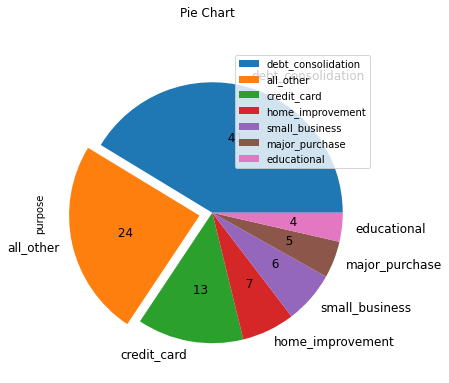

In [12]:
#Geaphical representation of the data
ff.plot.pie(subplots=True, figsize=(6,6), autopct='%3.f', fontsize=12, explode=(0,0.1,0,0,0,0,0), title='Pie Chart')
plt.show()

* As per the graph describing there are maximum 41% of the total customers who took loan for **debt_consolidation** purpose and only 4% of the customers took loan for educational purpose which is the minimum among all.

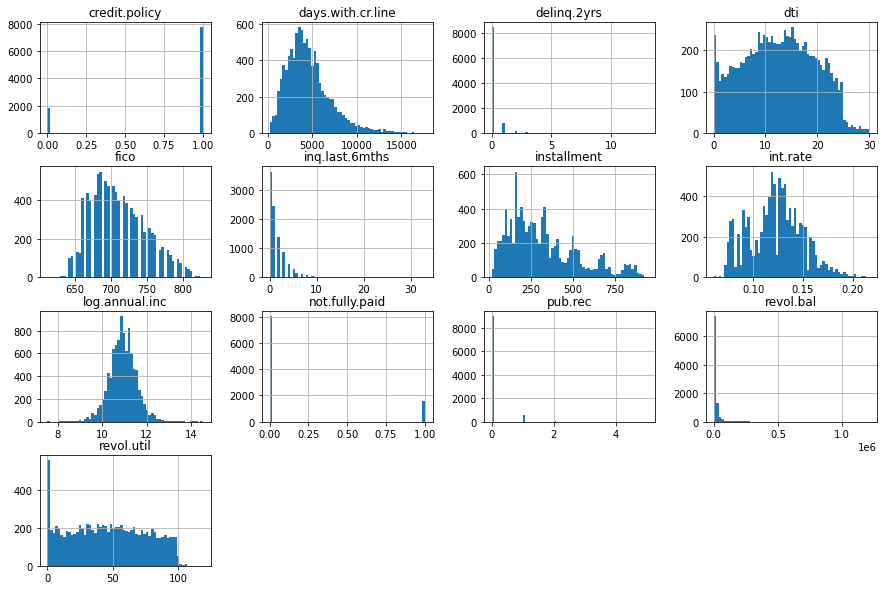

In [13]:
#data distribution
data.hist(bins=60,figsize=(15,10))
plt.show()

Text(0.5, 1.0, 'KDE of Installment')

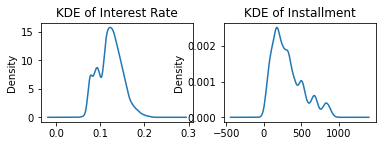

In [14]:
#KDE plots of interest rate and installment columns
plt.subplot(2,2,1)
data['int.rate'].plot.kde()
plt.title('KDE of Interest Rate')
plt.subplot(2,2,2)
data['installment'].plot.kde()
plt.title('KDE of Installment')

* It shows that the average rate of interest for the loan is 11.25%.

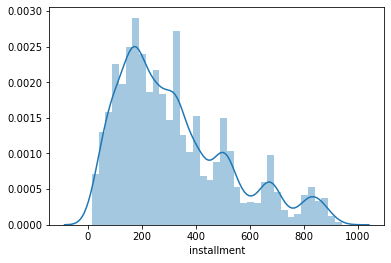

In [15]:
#Distribution plot of installment
sns.distplot(data['installment'])
plt.show()

* Mean installlment of the customers was close to 180

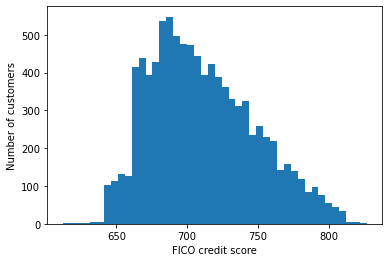

In [16]:
#Histograph of FICO column
plt.hist('fico', data=data, bins=44)
plt.ylabel('Number of customers')
plt.xlabel('FICO credit score')
plt.show()

* The are more than 500 customers having FICO credit score almost 690.

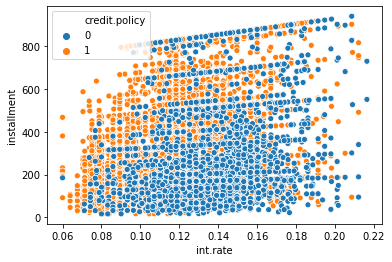

In [17]:
#Scatter plot - Credit.policy
sns.scatterplot('int.rate', 'installment',data=data, hue='credit.policy',legend='brief')
plt.show()

* The scatter plot shows how credit.policy is distributed between Int.rate and installment. 

* Mejority of the customers whose installment below 300 and interest rate ranges between 10 to 16% belongs to **a non-credit worthy** (label=0) category.

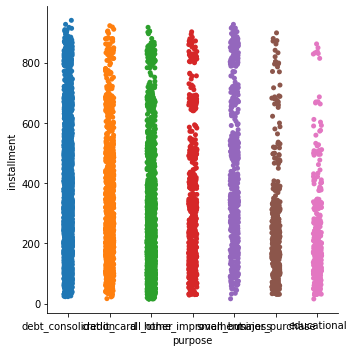

In [18]:
#Categorical plot - purpose
sns.catplot(x='purpose', y='installment', data=data)
plt.show()

* From the above graph we can see that the customer who has paid highest installment belongs to "debt_consolidation".
* People belongs to "educational" were paying lesser installment than other categorical people.

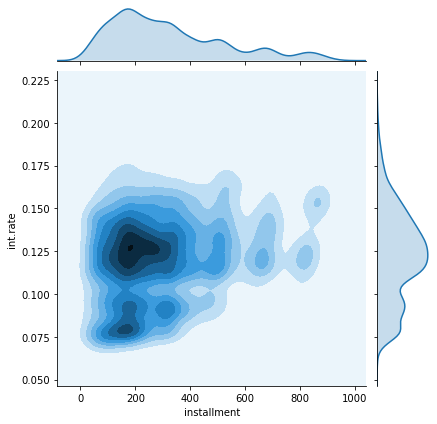

In [19]:
#Joint plot of installment and interest rate
sns.set
sns.jointplot('installment','int.rate', data=data, kind='kde')
plt.show()

* The jointplot shows that the density of points between int.rate and installment.
* The dark blue shows that there are more number of customers whose installment and int.rate at around 180 and 0.125 accordingly.

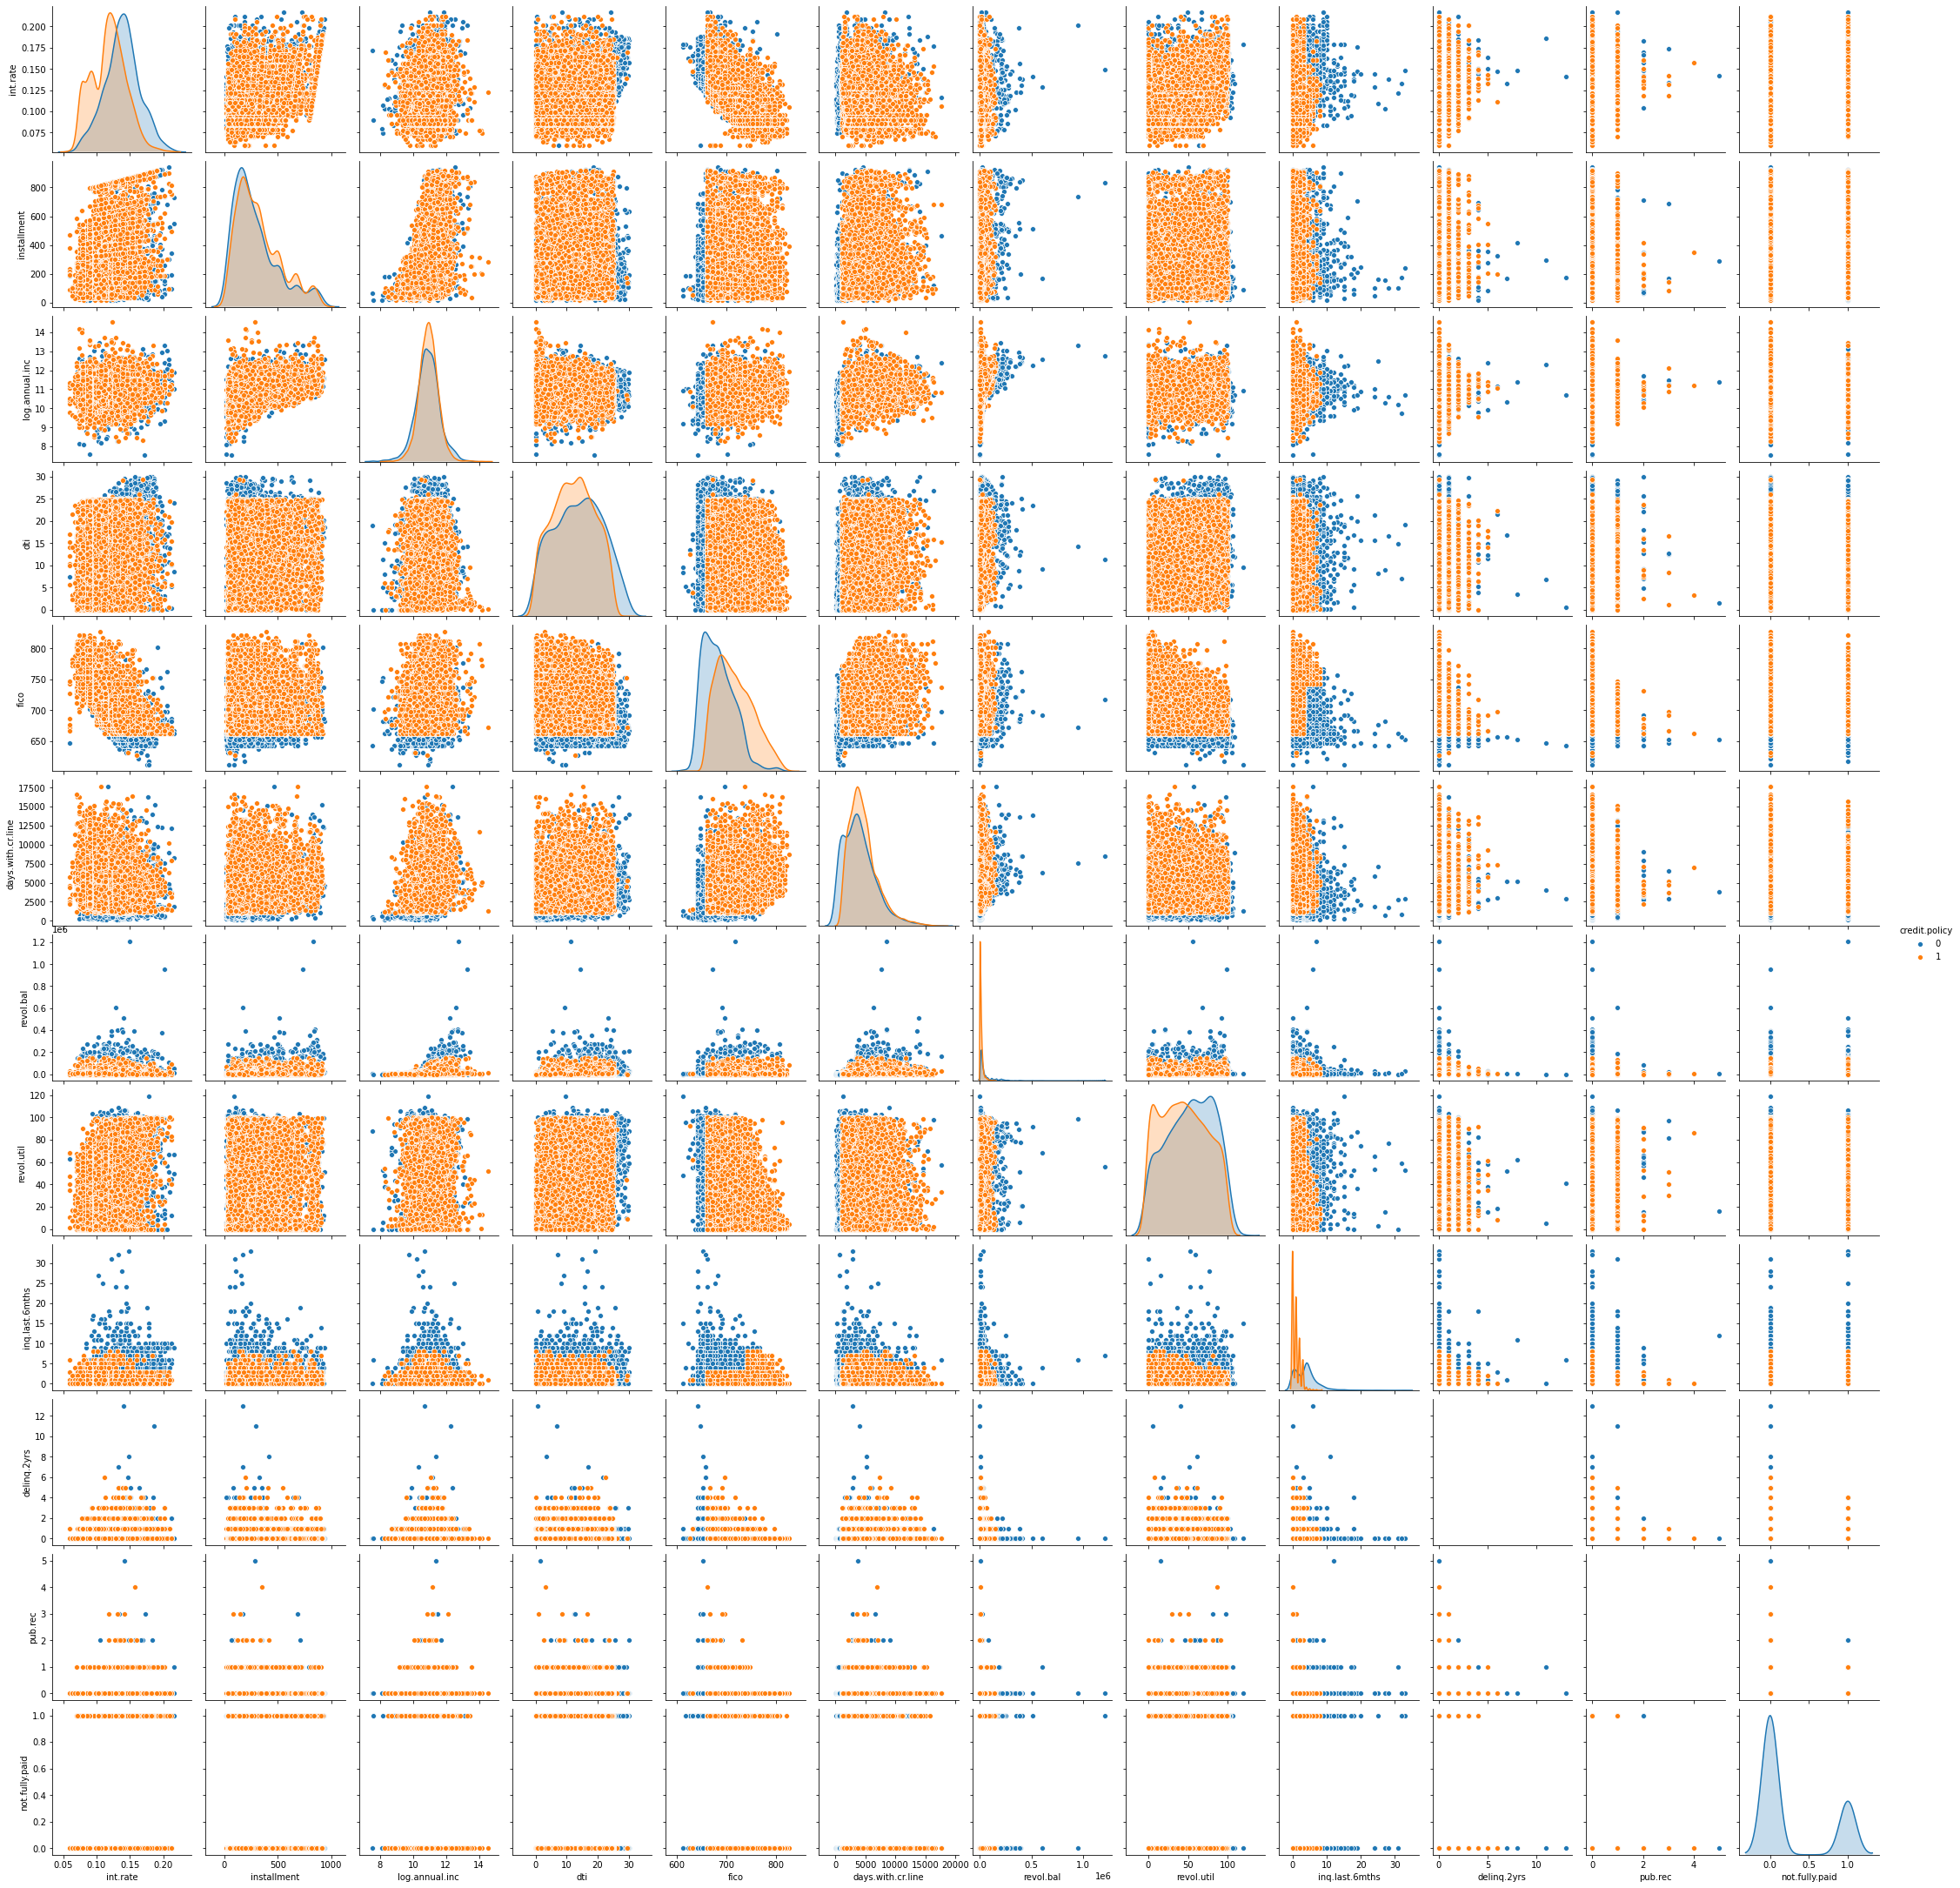

In [20]:
#pairplot
sns.pairplot(data, hue='credit.policy')
plt.show()

* The above graph is the pairplot of the data where the different categories of credit.policy is shown in two different colors.
* It shows how the data is distributed betweet two features.

# Feature Engineering.

In [21]:
#Check if there exist the multicollinearity between the features
data_corr_metrix=data.corr()
data_corr_metrix

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


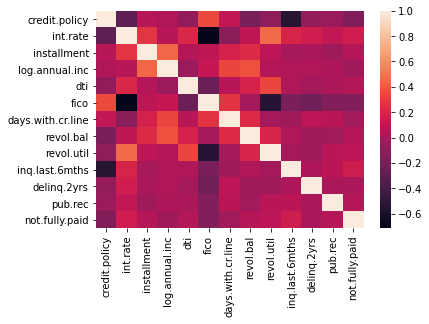

In [22]:
#Visualizing the correlation.matrix using heatmap
sns.heatmap(data_corr_metrix)

In [23]:
#Select the upper triangle of the correlation matrix.
upper_tri = data_corr_metrix.where(np.triu(np.ones(data_corr_metrix.shape),k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95.
high_var_column = [column for column in upper_tri if any(abs(upper_tri[column]) >0.95)]
high_var_column

[]

* here is no multicollinearity between the columns. Hence, we are considering all the columns.

In [24]:
#Converting the categorical column into numerical values
data = pd.get_dummies(data,prefix_sep='_', drop_first=True)

In [25]:
#Seperating the feature and label from the dataset
feature = data.iloc[:,1:].values
label = data.iloc[:,[0]].values

In [26]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
scfeature = StandardScaler()
feature = scfeature.fit_transform(feature)

In [27]:
#Split the training and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2, random_state=40)
#Stoping the shuffling of the data everytime we execute
tf.random.set_seed(40)
np.random.seed(40)

In [28]:
#shape of the feature data
feature.shape

(9578, 18)

In [29]:
#Build an ANN model
model = tf.keras.models.Sequential()
# units ---> How many neurons/nodes needs to initialized?
# Option1: No of units ---> No of features
# Option2: No of units ---> 3 * No of features
# Option3: No of units ---> 1/3 * No of features

#Add hidden layers with activation function 'relu'.
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(18,)))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Output layer with activation function 'sigmoid'
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [30]:
#compilation of the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
#Fit the model with the train data
trained_model = model.fit(x_train,y_train,epochs=100, validation_data=(x_test,y_test),verbose=True)

Epoch 1/100
240/240 [==============================] - 5s 13ms/step - loss: 0.6399 - accuracy: 0.7793 - val_loss: 0.4824 - val_accuracy: 0.8032
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4505 - accuracy: 0.8120 - val_loss: 0.3403 - val_accuracy: 0.8721
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8738 - val_loss: 0.2874 - val_accuracy: 0.8894
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2955 - accuracy: 0.8819 - val_loss: 0.2650 - val_accuracy: 0.8925
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2594 - accuracy: 0.8994 - val_loss: 0.2421 - val_accuracy: 0.9097
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2426 - accuracy: 0.9029 - val_loss: 0.2290 - val_accuracy: 0.9113
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2395 - accuracy: 0.9098 - val_loss: 0.2217 - val_accuracy: 0.917

Epoch 58/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1423 - accuracy: 0.9503 - val_loss: 0.1695 - val_accuracy: 0.9337
Epoch 59/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9471 - val_loss: 0.1665 - val_accuracy: 0.9358
Epoch 60/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1499 - accuracy: 0.9472 - val_loss: 0.1682 - val_accuracy: 0.9358
Epoch 61/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1393 - accuracy: 0.9540 - val_loss: 0.1650 - val_accuracy: 0.9389
Epoch 62/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1463 - accuracy: 0.9500 - val_loss: 0.1640 - val_accuracy: 0.9374
Epoch 63/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1320 - accuracy: 0.9567 - val_loss: 0.1612 - val_accuracy: 0.9389
Epoch 64/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1453 - accuracy: 0.9494 - val_loss: 0.1621 - val_accuracy:

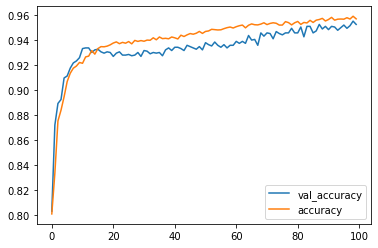

In [32]:
#visualising the performance of the model
plt.plot(trained_model.history['val_accuracy'])
plt.plot(trained_model.history['accuracy'])
plt.legend(['val_accuracy','accuracy'])

In [33]:
#Adding earlier stopping method to get the generalized model.
class My_Earlystop(tf.keras.callbacks.Callback):
    def __init__(self, cl):
        super(My_Earlystop, self).__init__()
        self.cl = cl
    def on_epoch_end(self, epochs, logs=None):
        test_score = logs['val_accuracy']
        train_score = logs['accuracy']
        #Writing a condition for geeralized model
        if (test_score>train_score and test_score>self.cl) or test_score==1:
            self.model.stop_training = True

In [34]:
#callback the Earlier stopping function
my_earlierstopping = My_Earlystop(cl=0.95)

In [35]:
#Fit the model and apply earlier stopping
final_model = model.fit(x_train,y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[my_earlierstopping])

Epoch 1/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1239 - accuracy: 0.9591 - val_loss: 0.1325 - val_accuracy: 0.9530
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9597 - val_loss: 0.1353 - val_accuracy: 0.9494
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1216 - accuracy: 0.9588 - val_loss: 0.1314 - val_accuracy: 0.9525
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.9575 - val_loss: 0.1313 - val_accuracy: 0.9551
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1201 - accuracy: 0.9597 - val_loss: 0.1266 - val_accuracy: 0.9546
Epoch 6/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1200 - accuracy: 0.9601 - val_loss: 0.1272 - val_accuracy: 0.9546
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 0.1192 - accuracy: 0.9593 - val_loss: 0.1334 - val_accuracy: 0.9556

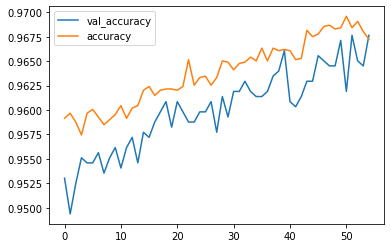

In [36]:
#Visualization of the model after Earlier stop function
plt.plot(final_model.history['val_accuracy'])
plt.plot(final_model.history['accuracy'])
plt.legend(['val_accuracy','accuracy'])

## Cheking model performace

In [37]:
#Since the dataset is an unbalanced data, we need to perform one more check, i.e. Domainwise Tolerance or F1 Score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
#get the predicted labels for all the feature data
predicted = model.predict_classes(feature)

In [39]:
#Confusion matrix to find the accuracy
matrix = confusion_matrix(label, predicted)
matrix

array([[1736,  132],
       [ 143, 7567]], dtype=int64)

In [40]:
#Classification report of the confusion matrix
report  =  classification_report(label, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1868
           1       0.98      0.98      0.98      7710

    accuracy                           0.97      9578
   macro avg       0.95      0.96      0.95      9578
weighted avg       0.97      0.97      0.97      9578



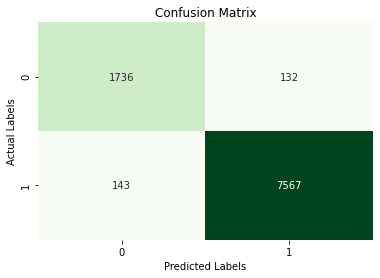

In [41]:
#plotting the confusion matrix tabel
ax = plt.subplot()
sns.heatmap(matrix,annot=True, ax=ax,fmt='g', cbar=False, cmap='Greens')
#labels and title of the graph
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

# Checking whether the model is trustworthy or not

* We do not want a credit worthy customer i.e label=1 being missclassified as label =0. Thus we take, 
* **Averarage of Precision (0) and Recall(1),** 
* **Average score: (0.92+0.98)/2=0.95**
* **Average F1 score: (0.93+0.98)/2 = 0.955**

* This model is **Acceptable** as the model is generalised model with testscore > than the given confidencial level (95%).

# Save the model 

In [42]:
model.save("Credit.policy.tf")

INFO:tensorflow:Assets written to: Credit.policy.tf\assets
